In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

#Path
try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
xdrive_path = os.path.join(parent_dir, 'xdrive')
sys.path.append(xdrive_path)

pipeline_path = os.path.join(parent_dir, 'Pipeline')
sys.path.append(pipeline_path)
# Now you can import your module from xdrive
import get_files_from_xdrive as gxdrive

In [37]:
forward_price  = gxdrive.read_file_from_xdrive_as_df('Forward_Price_Cleaned.csv')
df_all = gxdrive.read_file_from_xdrive_as_df('Prepared_Dataset_left_joint.csv')


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your file paths)
data = gxdrive.read_file_from_xdrive_as_df('Forward_Price_Cleaned.csv')  # Update with actual file path


# Convert DateTime and DeliveryStartDate to datetime objects for better handling
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Delivery_Start_Date_Forward_Price'] = pd.to_datetime(data['Delivery_Start_Date_Forward_Price'])

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Plot the evolution of Forward Prices over DateTime
sns.lineplot(
    data=data,
    x='DateTime', 
    y='Forward_Price_SE/CW(MWh)',
    hue='Delivery_Start_Date_Forward_Price',
    palette='viridis',
    legend='full'
)

# Customizing the plot
plt.title("Evolution of Forward Prices Over Time by Delivery Start Date", fontsize=14)
plt.xlabel("DateTime (Price Recorded)", fontsize=12)
plt.ylabel("Forward Price (SE/CW, MWh)", fontsize=12)
plt.legend(title="Delivery Start Date", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


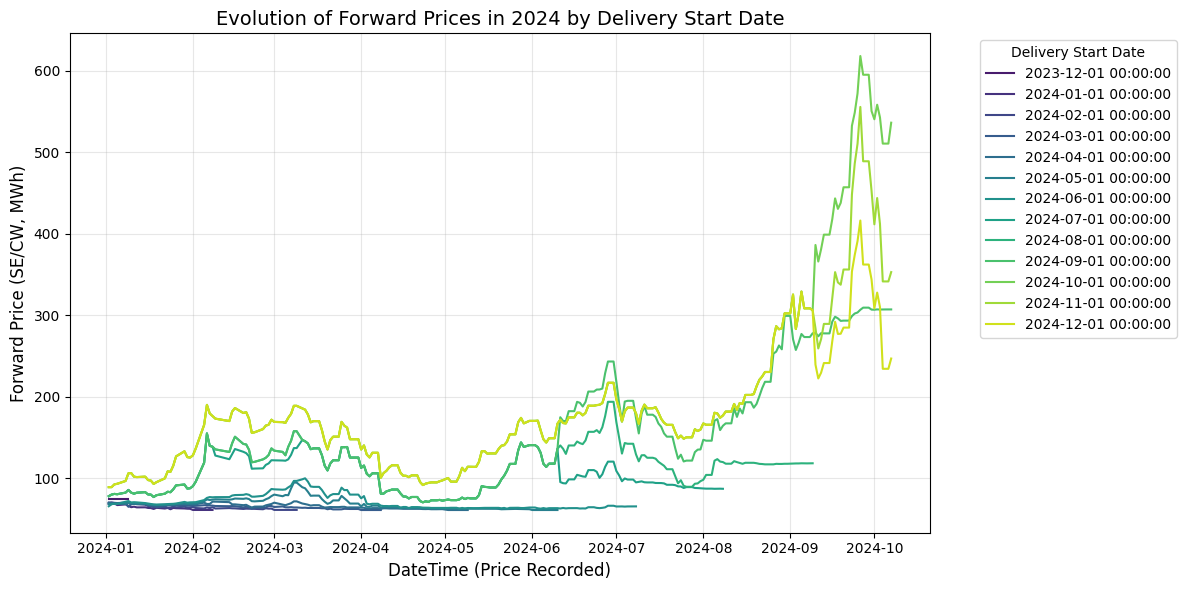

In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your file paths)
data = gxdrive.read_file_from_xdrive_as_df('Forward_Price_Cleaned.csv')  # Update with actual file path

# Convert DateTime and DeliveryStartDate to datetime objects for better handling
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Delivery_Start_Date_Forward_Price'] = pd.to_datetime(data['Delivery_Start_Date_Forward_Price'])

# Filter data for 2024 only
data_2024 = data[(data['DateTime'].dt.year == 2024) & (data['Delivery_Start_Date_Forward_Price'].dt.year < 2025)]

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Plot the evolution of Forward Prices in 2024
sns.lineplot(
    data=data_2024,
    x='DateTime', 
    y='Forward_Price_SE/CW(MWh)',
    hue='Delivery_Start_Date_Forward_Price',
    palette='viridis',
    legend='full'
)

# Customizing the plot
plt.title("Evolution of Forward Prices in 2024 by Delivery Start Date", fontsize=14)
plt.xlabel("DateTime (Price Recorded)", fontsize=12)
plt.ylabel("Forward Price (SE/CW, MWh)", fontsize=12)
plt.legend(title="Delivery Start Date", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
import plotly.graph_objects as go

# Convert DateTime and Delivery_Start_Date to datetime objects
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Delivery_Start_Date_Forward_Price'] = pd.to_datetime(data['Delivery_Start_Date_Forward_Price'])

# Filter data for the desired range (2022–2024 in this case)
data = data[(data['DateTime'].dt.year > 2021) & (data['Delivery_Start_Date_Forward_Price'].dt.year < 2025)]

# Pivot the data to create a grid for the surface plot
pivot_data = data.pivot_table(
    index='Delivery_Start_Date_Forward_Price', 
    columns='DateTime', 
    values='Forward_Price_SE/CW(MWh)'
).sort_index(axis=1).sort_index(axis=0)  # Sort both columns and rows for correct date ordering

# Extract the grid data
x = pivot_data.columns.astype(str)  # DateTime as strings for plotting
y = pivot_data.index.astype(str)    # DeliveryStartDate as strings for plotting
z = pivot_data.values               # Forward Price as z-values

# Create the surface plot
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale='Viridis')])

# Customize layout with larger scene and improved margins
fig.update_layout(
    title="Forward Price Surface Plot",
    scene=dict(
        xaxis_title="Price Recorded (DateTime)",
        yaxis_title="Delivery Start Date",
        zaxis_title="Forward Price (MWh)",
        xaxis=dict(tickangle=-45, tickfont=dict(size=10)),  # Adjust font size for x-axis
        yaxis=dict(tickfont=dict(size=10)),  # Adjust font size for y-axis
        zaxis=dict(tickfont=dict(size=10))   # Adjust font size for z-axis
    ),
    width=1200,  # Increase width
    height=800,  # Increase height
    margin=dict(l=0, r=0, t=50, b=0)  # Reduce margins
)

# Show the plot
fig.show()


In [34]:
import pandas as pd
import plotly.graph_objects as go

# Convert DateTime and Delivery_Start_Date to datetime objects
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Delivery_Start_Date_Forward_Price'] = pd.to_datetime(data['Delivery_Start_Date_Forward_Price'])

# Filter data for the desired range (2022–2024 in this case)
data = data[(data['DateTime'].dt.year > 2021) & (data['Delivery_Start_Date_Forward_Price'].between('2022-01-01', '2025-12-31'))]

# Pivot the data to create a grid for the surface plot
pivot_data = data.pivot_table(
    index='Delivery_Start_Date_Forward_Price', 
    columns='DateTime', 
    values='Forward_Price_SE/CW(MWh)'
).sort_index(axis=1, ascending=True).sort_index(axis=0, ascending=True)  # Sort in descending order

# Extract the grid data
DateTime = pivot_data.columns.astype(str)  # DateTime as strings for plotting
DeliveryStartDate = pivot_data.index.astype(str)    # DeliveryStartDate as strings for plotting
Price = pivot_data.values               # Forward Price as z-values

# Create the surface plot
fig = go.Figure(data=[go.Surface(z=Price, x=DateTime, y=DeliveryStartDate, colorscale='Viridis')])

# Customize layout with larger scene and improved margins
fig.update_layout(
    title="Forward Price Surface Plot (Descending Dates)",
    scene=dict(
        xaxis_title="Price Recorded (DateTime)",
        yaxis_title="Delivery Start Date",
        zaxis_title="Forward Price (MWh)",
        xaxis=dict(tickangle=-45, tickfont=dict(size=10)),  # Adjust font size for x-axis
        yaxis=dict(tickfont=dict(size=10)),  # Adjust font size for y-axis
        zaxis=dict(tickfont=dict(size=10))   # Adjust font size for z-axis
    ),
    width=1200,  # Increase width
    height=800,  # Increase height
    margin=dict(l=0, r=0, t=50, b=0)  # Reduce margins
)

# Show the plot
fig.show()


In [32]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df_2022_2025 is your dataset
df_2022_2025 = data.copy()  # Replace with your actual dataset variable
df_2022_2025['DateTime'] = pd.to_datetime(df_2022_2025['DateTime'])
df_2022_2025['Delivery_Start_Date_Forward_Price'] = pd.to_datetime(df_2022_2025['Delivery_Start_Date_Forward_Price'])

# Create a pivot table for the surface plot
pivot_data = df_2022_2025.pivot_table(
    index='Delivery_Start_Date_Forward_Price',
    columns='DateTime',
    values='Forward_Price_SE/CW(MWh)'
).sort_index(axis=1).sort_index(axis=0)  # Sort rows and columns for better ordering

# Extract the data for plotting
x = pivot_data.columns.astype(str)  # DateTime as strings for plotting
y = pivot_data.index.astype(str)    # DeliveryStartDate as strings for plotting
z = pivot_data.values               # Forward Price as z-values

# Create the surface plot with contours (grid effect)
fig = go.Figure(data=[go.Surface(
    z=z,
    x=x,
    y=y,
    colorscale='Viridis',
    contours={
        "z": {"show": True, "usecolormap": True, "highlightcolor": "white", "project_z": True}
    }
)])

# Customize the layout
fig.update_layout(
    title="3D Surface Plot with Contour Grid (Forecasted Prices for Delivery Dates)",
    scene=dict(
        xaxis_title="DateTime (Forecast Date)",
        yaxis_title="Delivery Start Date",
        zaxis_title="Price (MWh)",
        xaxis=dict(tickangle=-45, tickfont=dict(size=10)),  # Adjust font size for x-axis
        yaxis=dict(tickfont=dict(size=10)),  # Adjust font size for y-axis
        zaxis=dict(tickfont=dict(size=10)),  # Adjust font size for z-axis
    ),
    width=1200,  # Wider plot for better view
    height=800,  # Taller plot
    margin=dict(l=0, r=0, t=50, b=0)  # Adjust margins
)

# Add a color bar for prices
fig.update_coloraxes(colorbar_title="Price (MWh)")

# Show the plot
fig.show()


In [5]:
forward_price

,DateTime,Delivery_Start_Date_Forward_Price,Forward_Price_SE/CW(MWh)
0,2021-04-30,2021-05-01,218.37
1,2021-04-30,2021-06-01,322.73
2,2021-04-30,2021-07-01,409.43
3,2021-04-30,2021-08-01,411.49
4,2021-04-30,2021-09-01,411.49
...,...,...,...
69540,2024-10-07,2045-08-01,135.29
69541,2024-10-07,2045-09-01,135.29
69542,2024-10-07,2045-10-01,135.29
69543,2024-10-07,2045-11-01,135.29


<Axes: ylabel='Frequency'>

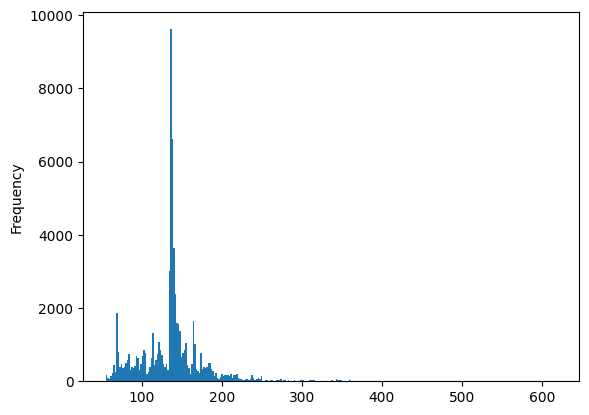

In [10]:
forward_price['Forward_Price_SE/CW(MWh)'].plot(kind='hist', bins=300)

In [ ]:
df_all = 

UndefinedVariableError: name 'Forward_Price_SE' is not defined

In [6]:
# Ensure DateTime is in datetime format
forward_price['DateTime'] = pd.to_datetime(forward_price['DateTime'])

# Add a day-of-week column for analysis
forward_price['DayOfWeek'] = forward_price['DateTime'].dt.day_name()

# Display dataset summary
print("Dataset Info:")
print(forward_price.info())
print("\nSample Data:")
display(forward_price.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69545 entries, 0 to 69544
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   DateTime                           69545 non-null  datetime64[ns]
 1   Delivery_Start_Date_Forward_Price  69545 non-null  object        
 2   Forward_Price_SE/CW(MWh)           69545 non-null  float64       
 3   DayOfWeek                          69545 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.1+ MB
None

Sample Data:


,DateTime,Delivery_Start_Date_Forward_Price,Forward_Price_SE/CW(MWh),DayOfWeek
0,2021-04-30,2021-05-01,218.37,Friday
1,2021-04-30,2021-06-01,322.73,Friday
2,2021-04-30,2021-07-01,409.43,Friday
3,2021-04-30,2021-08-01,411.49,Friday
4,2021-04-30,2021-09-01,411.49,Friday


In [7]:
# Generate a complete date range
full_date_range = pd.date_range(start=forward_price['DateTime'].min(),
                                end=forward_price['DateTime'].max(),
                                freq='D')

# Identify missing dates
missing_dates = set(full_date_range) - set(forward_price['DateTime'])

# Filter missing dates to find weekends
missing_weekends = [date for date in missing_dates if date.weekday() >= 5]

print(f"Number of missing weekend dates: {len(missing_weekends)}")
print("Missing weekend dates:", sorted(missing_weekends))


Number of missing weekend dates: 299
Missing weekend dates: [Timestamp('2021-05-01 00:00:00'), Timestamp('2021-05-02 00:00:00'), Timestamp('2021-05-08 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-05-15 00:00:00'), Timestamp('2021-05-16 00:00:00'), Timestamp('2021-05-22 00:00:00'), Timestamp('2021-05-23 00:00:00'), Timestamp('2021-05-29 00:00:00'), Timestamp('2021-05-30 00:00:00'), Timestamp('2021-06-05 00:00:00'), Timestamp('2021-06-06 00:00:00'), Timestamp('2021-06-12 00:00:00'), Timestamp('2021-06-13 00:00:00'), Timestamp('2021-06-19 00:00:00'), Timestamp('2021-06-20 00:00:00'), Timestamp('2021-06-26 00:00:00'), Timestamp('2021-06-27 00:00:00'), Timestamp('2021-07-03 00:00:00'), Timestamp('2021-07-04 00:00:00'), Timestamp('2021-07-10 00:00:00'), Timestamp('2021-07-11 00:00:00'), Timestamp('2021-07-17 00:00:00'), Timestamp('2021-07-18 00:00:00'), Timestamp('2021-07-24 00:00:00'), Timestamp('2021-07-25 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-08-01

In [8]:
# Filter dataset for weekends
weekend_data = forward_price[forward_price['DayOfWeek'].isin(['Saturday', 'Sunday'])]

print(f"Number of weekend observations: {len(weekend_data)}")
display(weekend_data.head())

# Compare weekend values to previous Friday
def get_previous_friday(date):
    return date - pd.Timedelta(days=date.weekday() - 4)

weekend_data['PreviousFriday'] = weekend_data['DateTime'].apply(get_previous_friday)
weekend_data = weekend_data.merge(forward_price[['DateTime', 'Forward_Price_SE/CW(MWh)']],
                                   left_on='PreviousFriday', right_on='DateTime', suffixes=('', '_Friday'))

# Check if weekend data equals Friday's observation
weekend_data['MatchesFriday'] = weekend_data['Forward_Price_SE/CW(MWh)'] == weekend_data['Forward_Price_SE/CW(MWh)_Friday']

print(f"Weekend data matches Friday: {weekend_data['MatchesFriday'].mean() * 100:.2f}%")
display(weekend_data)


Number of weekend observations: 9500


,DateTime,Delivery_Start_Date_Forward_Price,Forward_Price_SE/CW(MWh),DayOfWeek
36835,2024-03-09,2024-02-01,61.20,Saturday
36836,2024-03-09,2024-03-01,64.19,Saturday
36837,2024-03-09,2024-04-01,71.69,Saturday
36838,2024-03-09,2024-05-01,94.74,Saturday
36839,2024-03-09,2024-06-01,96.81,Saturday


C:\Users\lilla\AppData\Local\Temp\ipykernel_62936\1790017407.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_data['PreviousFriday'] = weekend_data['DateTime'].apply(get_previous_friday)


Weekend data matches Friday: 17.19%


,DateTime,Delivery_Start_Date_Forward_Price,Forward_Price_SE/CW(MWh),DayOfWeek,PreviousFriday,DateTime_Friday,Forward_Price_SE/CW(MWh)_Friday,MatchesFriday
0,2024-03-09,2024-02-01,61.20,Saturday,2024-03-08,2024-03-08,61.20,True
1,2024-03-09,2024-02-01,61.20,Saturday,2024-03-08,2024-03-08,64.19,False
2,2024-03-09,2024-02-01,61.20,Saturday,2024-03-08,2024-03-08,71.69,False
3,2024-03-09,2024-02-01,61.20,Saturday,2024-03-08,2024-03-08,94.74,False
4,2024-03-09,2024-02-01,61.20,Saturday,2024-03-08,2024-03-08,96.81,False
...,...,...,...,...,...,...,...,...
1930677,2024-10-06,2045-12-01,135.99,Sunday,2024-10-04,2024-10-04,135.99,True
1930678,2024-10-06,2045-12-01,135.99,Sunday,2024-10-04,2024-10-04,135.99,True
1930679,2024-10-06,2045-12-01,135.99,Sunday,2024-10-04,2024-10-04,135.99,True
1930680,2024-10-06,2045-12-01,135.99,Sunday,2024-10-04,2024-10-04,135.99,True


In [6]:
print("Columns in weekend_data after merge:", weekend_data.columns)


Columns in weekend_data after merge: Index(['DateTime', 'Delivery_Start_Date_Forward_Price',
       'Forward_Price_SE/CW(MWh)', 'DayOfWeek', 'PreviousFriday',
       'DateTime_Friday', 'Forward_Price_SE/CW(MWh)_Friday', 'MatchesFriday'],
      dtype='object')


In [7]:
# Convert date columns to datetime format
forward_price['DateTime'] = pd.to_datetime(forward_price['DateTime'])
forward_price['Delivery_Start_Date_Forward_Price'] = pd.to_datetime(forward_price['Delivery_Start_Date_Forward_Price'])

# Inspect data structure
print(forward_price.info())
print(forward_price.head())

# Basic statistics
print(forward_price.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69545 entries, 0 to 69544
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   DateTime                           69545 non-null  datetime64[ns]
 1   Delivery_Start_Date_Forward_Price  69545 non-null  datetime64[ns]
 2   Forward_Price_SE/CW(MWh)           69545 non-null  float64       
 3   DayOfWeek                          69545 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 2.1+ MB
None
    DateTime Delivery_Start_Date_Forward_Price  Forward_Price_SE/CW(MWh)  \
0 2021-04-30                        2021-05-01                    218.37   
1 2021-04-30                        2021-06-01                    322.73   
2 2021-04-30                        2021-07-01                    409.43   
3 2021-04-30                        2021-08-01                    411.49   
4 2021-04-

# Missing Dates

Missing Dates: 374
DatetimeIndex(['2021-05-01', '2021-05-02', '2021-05-03', '2021-05-08',
               '2021-05-09', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-15', '2021-05-16',
               ...
               '2024-02-17', '2024-02-18', '2024-02-24', '2024-02-25',
               '2024-03-02', '2024-03-03', '2024-03-10', '2024-03-29',
               '2024-05-01', '2024-05-30'],
              dtype='datetime64[ns]', length=374, freq=None)


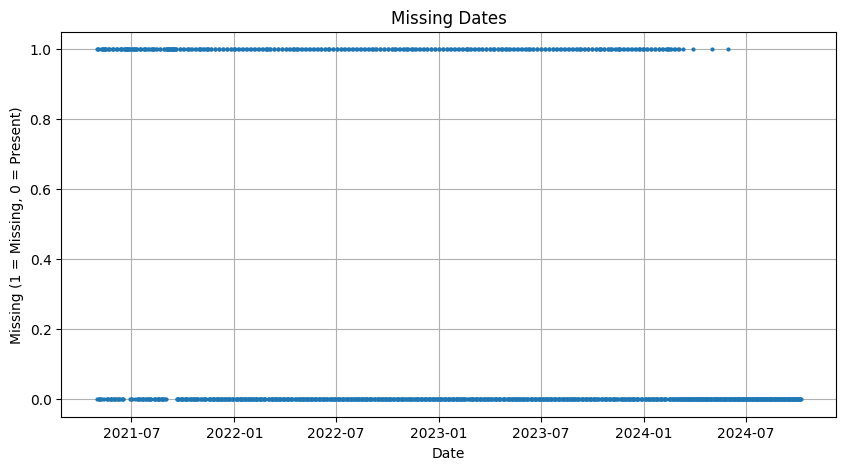

In [8]:
# Create a complete date range
full_range = pd.date_range(forward_price['DateTime'].min(), forward_price['DateTime'].max(), freq='D')

# Check missing dates
missing_dates = full_range.difference(forward_price['DateTime'])
print(f"Missing Dates: {len(missing_dates)}")
print(missing_dates)

# Visualize missing dates
plt.figure(figsize=(10, 5))
all_dates = pd.DataFrame({'DateTime': full_range})
all_dates['IsMissing'] = ~all_dates['DateTime'].isin(forward_price['DateTime'])
plt.plot(all_dates['DateTime'], all_dates['IsMissing'], marker='o', linestyle='', markersize=2)
plt.title('Missing Dates')
plt.xlabel('Date')
plt.ylabel('Missing (1 = Missing, 0 = Present)')
plt.grid()
plt.show()


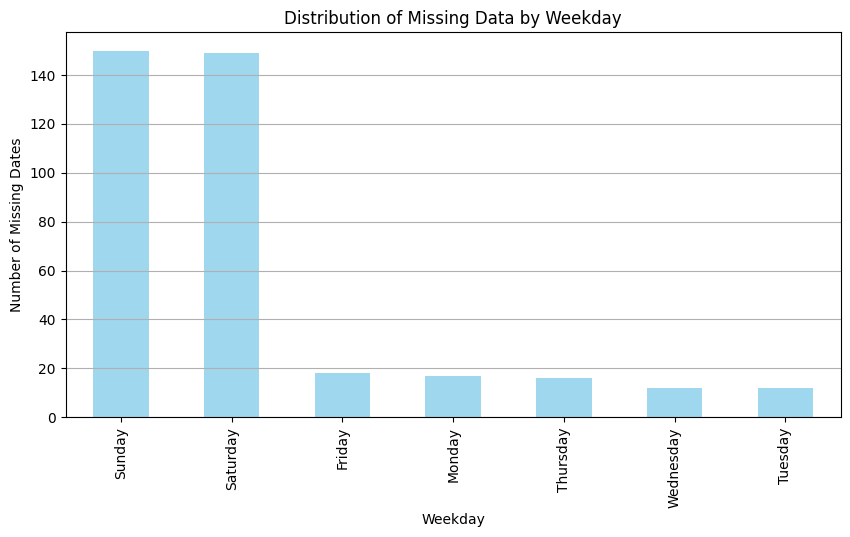

Weekday
Sunday       150
Saturday     149
Friday        18
Monday        17
Thursday      16
Wednesday     12
Tuesday       12
Name: count, dtype: int64

In [9]:
# Extract weekdays from the missing dates
missing_dates_df = pd.DataFrame({'Missing_Date': missing_dates})
missing_dates_df['Weekday'] = missing_dates_df['Missing_Date'].dt.day_name()

# Count occurrences of each weekday
missing_weekday_counts = missing_dates_df['Weekday'].value_counts()

# Plot the distribution of missing data across weekdays
plt.figure(figsize=(10, 5))
missing_weekday_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Distribution of Missing Data by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Missing Dates')
plt.grid(axis='y')
plt.show()

missing_weekday_counts


In [10]:
# Extract the exact missing dates
exact_missing_dates = missing_dates.to_list()

# Display the exact missing dates
exact_missing_dates[:] 



[Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-05-02 00:00:00'),
 Timestamp('2021-05-03 00:00:00'),
 Timestamp('2021-05-08 00:00:00'),
 Timestamp('2021-05-09 00:00:00'),
 Timestamp('2021-05-11 00:00:00'),
 Timestamp('2021-05-12 00:00:00'),
 Timestamp('2021-05-13 00:00:00'),
 Timestamp('2021-05-15 00:00:00'),
 Timestamp('2021-05-16 00:00:00'),
 Timestamp('2021-05-17 00:00:00'),
 Timestamp('2021-05-21 00:00:00'),
 Timestamp('2021-05-22 00:00:00'),
 Timestamp('2021-05-23 00:00:00'),
 Timestamp('2021-05-28 00:00:00'),
 Timestamp('2021-05-29 00:00:00'),
 Timestamp('2021-05-30 00:00:00'),
 Timestamp('2021-06-03 00:00:00'),
 Timestamp('2021-06-05 00:00:00'),
 Timestamp('2021-06-06 00:00:00'),
 Timestamp('2021-06-10 00:00:00'),
 Timestamp('2021-06-12 00:00:00'),
 Timestamp('2021-06-13 00:00:00'),
 Timestamp('2021-06-14 00:00:00'),
 Timestamp('2021-06-18 00:00:00'),
 Timestamp('2021-06-19 00:00:00'),
 Timestamp('2021-06-20 00:00:00'),
 Timestamp('2021-06-21 00:00:00'),
 Timestamp('2021-06-

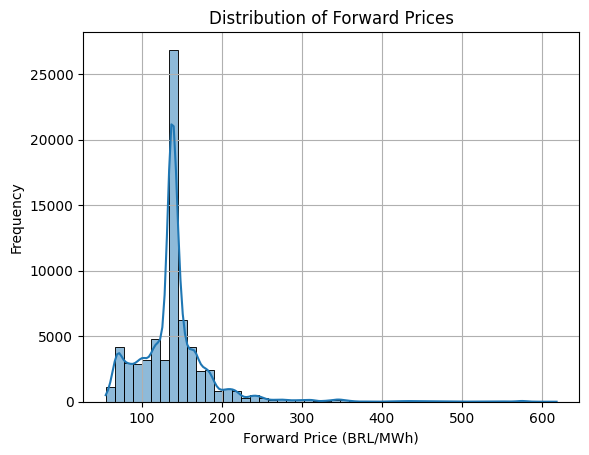

In [11]:
# Plot distribution of Forward Prices
sns.histplot(forward_price['Forward_Price_SE/CW(MWh)'], kde=True, bins=50)
plt.title('Distribution of Forward Prices')
plt.xlabel('Forward Price (BRL/MWh)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [39]:
df_all.columns

Index(['DateTime', 'Delivery_Start_Date_Forward_Price',
       'Forward_Price_SE/CW(MWh)', 'Average_Settlement_Price_SE/CW(MWh)',
       'Standard_Deviation_Settlement_Price_SE(MWh)',
       'Min_Settlement_Price_SE(MWh)', 'Max_Settlement_Price_SE(MWh)',
       'Hydro_Inflow_N(MWavg)', 'Hydro_Inflow_NE(MWavg)',
       'Hydro_Inflow_S(MWavg)', 'Hydro_Inflow_SE/CW(MWavg)',
       'Daily_Sum_Hydro_Inflow(MWavg)', 'Solar_Generated_Sum_NE(MWavg)',
       'Solar_Generated_Sum_SE/CW(MWavg)', 'Solar_Generated_Mean_NE(MWavg)',
       'Solar_Generated_Mean_SE/CW(MWavg)', 'Daily_Sum_Solar_Generated(MWavg)',
       'Wind_Generation_N(MWavg)', 'Wind_Generation_NE(MWavg)',
       'Wind_Generation_S(MWavg)', 'Wind_Generation_SUM(MWavg)',
       'Hydroelectric_capacity_NE(MWavg)', 'Hydroelectric_capacity_N(MWavg)',
       'Hydroelectric_capacity_SE/CW(MWavg)',
       'Hydroelectric_capacity_S(MWavg)', 'Thermal_capacity_NE(MWavg)',
       'Thermal_capacity_N(MWavg)', 'Thermal_capacity_SE/CW(MWavg)',
  

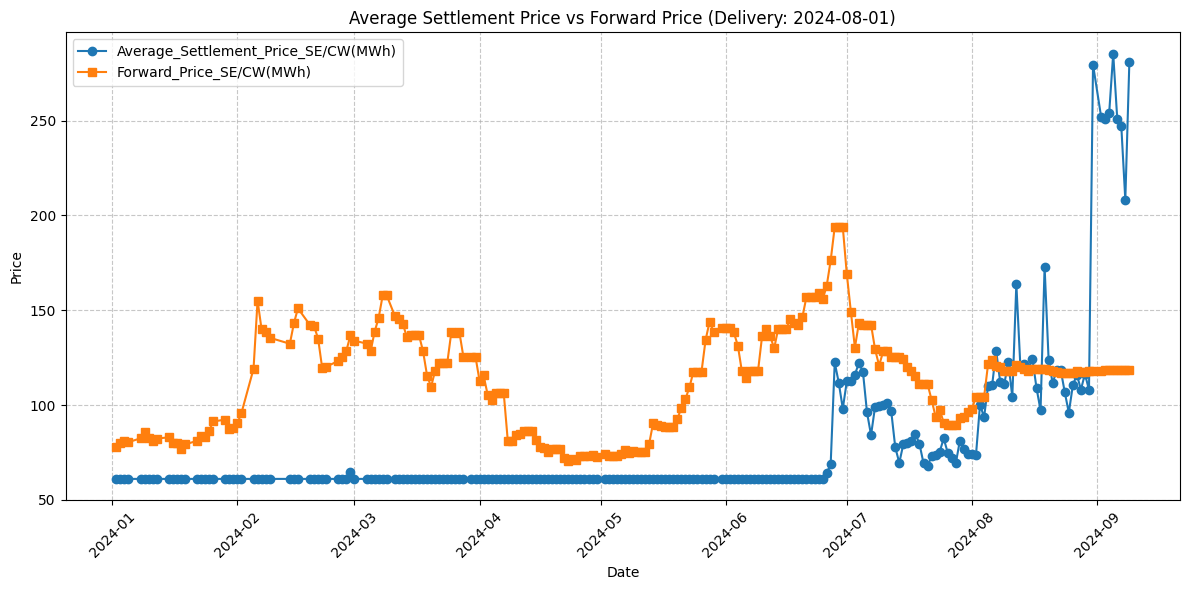

In [43]:
df_all['DateTime'] = pd.to_datetime(df_all['DateTime'])


# Filter the data
filtered_df = df_all[
    (df_all['DateTime'] >= '2024-01-01') & 
    (df_all['DateTime'] <= '2024-09-12') & 
    (df_all['Delivery_Start_Date_Forward_Price'] == '2024-08-01')
]

# Sort the dataframe by Date
filtered_df = filtered_df.sort_values('DateTime')

# Create the plot
plt.figure(figsize=(12, 6))

# Plot Settlement Price
plt.plot(filtered_df['DateTime'], filtered_df['Average_Settlement_Price_SE/CW(MWh)'], label='Average_Settlement_Price_SE/CW(MWh)', marker='o')

# Plot Forward Price
plt.plot(filtered_df['DateTime'], filtered_df['Forward_Price_SE/CW(MWh)'], label='Forward_Price_SE/CW(MWh)', marker='s')

# Customize the plot
plt.title('Average Settlement Price vs Forward Price (Delivery: 2024-08-01)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

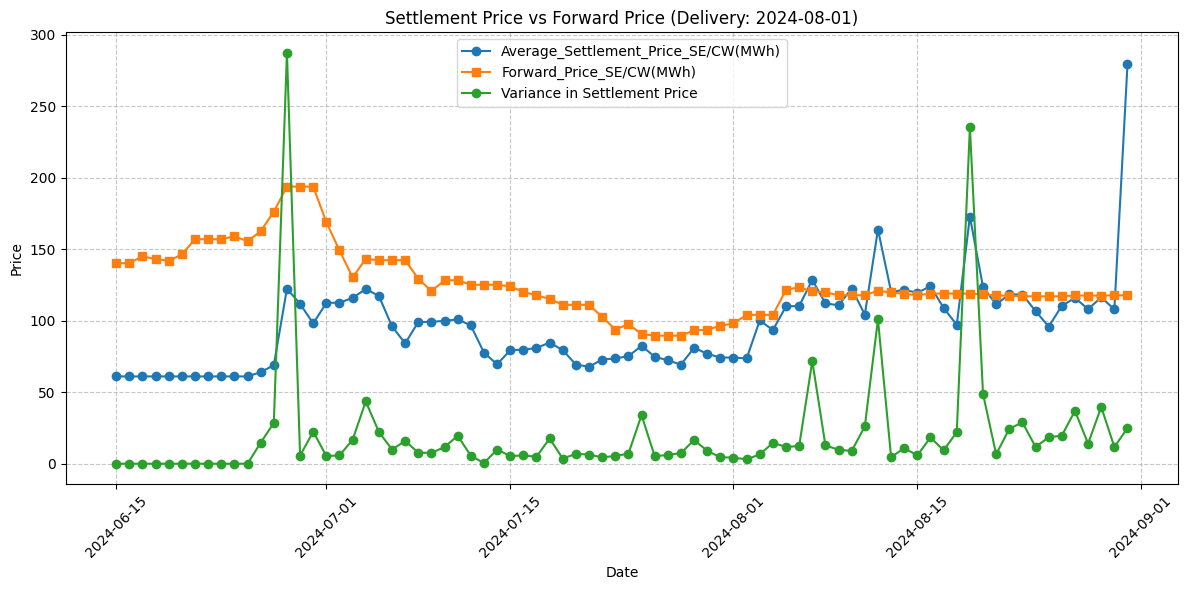

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df_all[
    (df_all['DateTime'] >= '2024-06-15') & 
    (df_all['DateTime'] <= '2024-08-31') & 
      (df_all['Delivery_Start_Date_Forward_Price'] == '2024-08-01')
]


# Sort the dataframe by Date
filtered_df = filtered_df.sort_values('DateTime')


# Create the plot
plt.figure(figsize=(12, 6))

# Plot Settlement Price
plt.plot(filtered_df['DateTime'], filtered_df['Average_Settlement_Price_SE/CW(MWh)'], label='Average_Settlement_Price_SE/CW(MWh)', marker='o')

# Plot Forward Price
plt.plot(filtered_df['DateTime'], filtered_df['Forward_Price_SE/CW(MWh)'], label='Forward_Price_SE/CW(MWh)', marker='s')
# Plot Settlement Price
plt.plot(filtered_df['DateTime'], filtered_df['Standard_Deviation_Settlement_Price_SE(MWh)'], label='Variance in Settlement Price', marker='o')


# Customize the plot
plt.title('Settlement Price vs Forward Price (Delivery: 2024-08-01)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

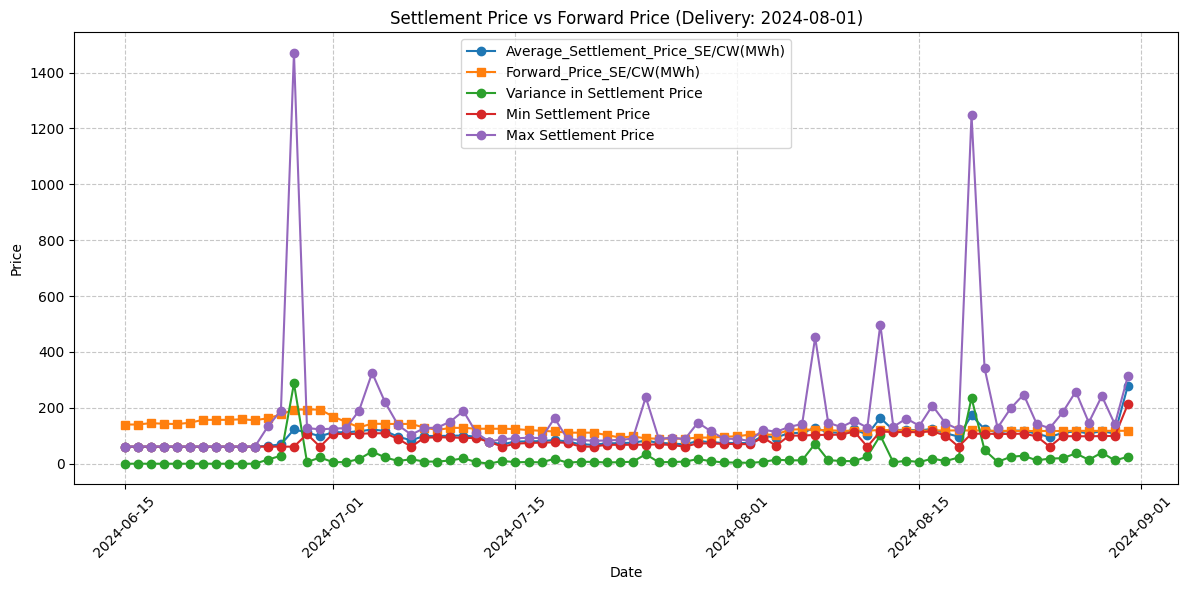

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df_all[
    (df_all['DateTime'] >= '2024-06-15') & 
    (df_all['DateTime'] <= '2024-08-31') & 
      (df_all['Delivery_Start_Date_Forward_Price'] == '2024-08-01')
]


# Sort the dataframe by Date
filtered_df = filtered_df.sort_values('DateTime')


# Create the plot
plt.figure(figsize=(12, 6))

# Plot Settlement Price
plt.plot(filtered_df['DateTime'], filtered_df['Average_Settlement_Price_SE/CW(MWh)'], label='Average_Settlement_Price_SE/CW(MWh)', marker='o')

# Plot Forward Price
plt.plot(filtered_df['DateTime'], filtered_df['Forward_Price_SE/CW(MWh)'], label='Forward_Price_SE/CW(MWh)', marker='s')
# Plot Settlement Price
plt.plot(filtered_df['DateTime'], filtered_df['Standard_Deviation_Settlement_Price_SE(MWh)'], label='Variance in Settlement Price', marker='o')

# Plot Settlement Price
plt.plot(filtered_df['DateTime'], filtered_df['Min_Settlement_Price_SE(MWh)'], label='Min Settlement Price', marker='o')

plt.plot(filtered_df['DateTime'], filtered_df['Max_Settlement_Price_SE(MWh)'], label='Max Settlement Price', marker='o')


# Customize the plot
plt.title('Settlement Price vs Forward Price (Delivery: 2024-08-01)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

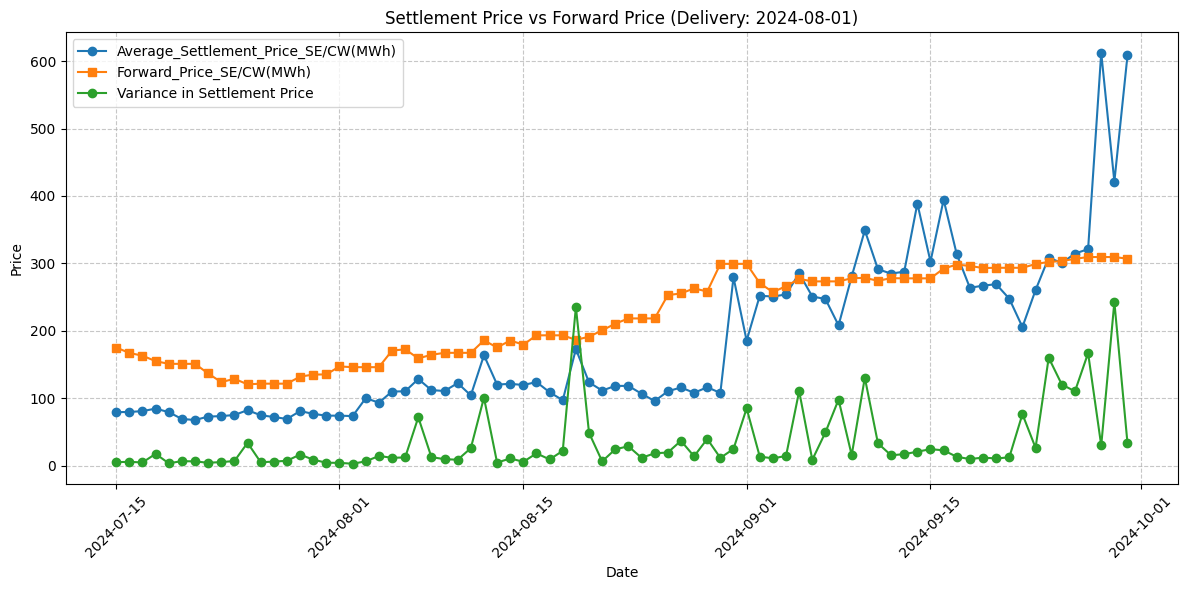

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df_all[
    (df_all['DateTime'] >= '2024-07-15') & 
    (df_all['DateTime'] <= '2024-09-30') & 
      (df_all['Delivery_Start_Date_Forward_Price'] == '2024-09-01')
]


# Sort the dataframe by Date
filtered_df = filtered_df.sort_values('DateTime')


# Create the plot
plt.figure(figsize=(12, 6))

# Plot Settlement Price
plt.plot(filtered_df['DateTime'], filtered_df['Average_Settlement_Price_SE/CW(MWh)'], label='Average_Settlement_Price_SE/CW(MWh)', marker='o')

# Plot Forward Price
plt.plot(filtered_df['DateTime'], filtered_df['Forward_Price_SE/CW(MWh)'], label='Forward_Price_SE/CW(MWh)', marker='s')
# Plot Settlement Price
plt.plot(filtered_df['DateTime'], filtered_df['Standard_Deviation_Settlement_Price_SE(MWh)'], label='Variance in Settlement Price', marker='o')

# Plot Settlement Price
#plt.plot(filtered_df['DateTime'], filtered_df['Min_Settlement_Price_SE(MWh)'], label='Min Settlement Price', marker='o')

#plt.plot(filtered_df['DateTime'], filtered_df['Max_Settlement_Price_SE(MWh)'], label='Max Settlement Price', marker='o')


# Customize the plot
plt.title('Settlement Price vs Forward Price (Delivery: 2024-08-01)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

To compare forward market predictions with actual settlement prices, first the hourly settlement prices are aggregated to calculate their daily averages. This allows to merge the forward price data with the daily average settlement prices based on the DateTime column. A deeper analysis of August 2024 shows the impact of daily volatility in settlement price on forward prices. As mentioned previously y aggregating daily, the hourly settlement prices regarding their variance (the degree of price fluctuations within each day), a clearer pattern can be observed.

In [ ]:
# Convert 'DateTime' in df_sp to datetime for alignment
df_sp['DateTime'] = pd.to_datetime(df_sp['DateTime'])

# Check if any missing forward price dates are present in the settlement price dataset
missing_with_sp = df_sp[df_sp['DateTime'].isin(missing_dates)]

# Display the results
missing_with_sp


In [ ]:
# Identify missing dates from the settlement price dataset
full_range_sp = pd.date_range(df_sp['DateTime'].min(), df_sp['DateTime'].max(), freq='D')
missing_dates_sp = full_range_sp.difference(df_sp['DateTime'])

# Find common missing dates between both datasets
common_missing_dates = set(missing_dates).intersection(set(missing_dates_sp))

# Convert to DataFrame and extract weekdays
common_missing_df = pd.DataFrame({'DateTime': list(common_missing_dates)})
common_missing_df['Weekday'] = common_missing_df['DateTime'].dt.day_name()

# Count occurrences of each weekday
common_missing_weekday_counts = common_missing_df['Weekday'].value_counts()

# Plot the distribution of common missing dates by weekday
plt.figure(figsize=(10, 5))
common_missing_weekday_counts.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Common Missing Dates by Weekday (Forward and Settlement Price)')
plt.xlabel('Weekday')
plt.ylabel('Number of Common Missing Dates')
plt.grid(axis='y')
plt.show()

common_missing_weekday_counts


In [ ]:
# Find missing dates in the settlement price dataset that are not missing in the forward price dataset
missing_only_in_sp = set(missing_dates_sp).difference(set(missing_dates))

# Convert to DataFrame and extract weekdays
missing_only_in_sp_df = pd.DataFrame({'DateTime': list(missing_only_in_sp)})
missing_only_in_sp_df['Weekday'] = missing_only_in_sp_df['DateTime'].dt.day_name()

# Count occurrences of each weekday
missing_only_in_sp_weekday_counts = missing_only_in_sp_df['Weekday'].value_counts()

# Plot the distribution of settlement-price-only missing dates by weekday
plt.figure(figsize=(10, 5))
missing_only_in_sp_weekday_counts.plot(kind='bar', color='green', alpha=0.8)
plt.title('Settlement Price Missing Dates Not Missing in Forward Price by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Missing Dates')
plt.grid(axis='y')
plt.show()

missing_only_in_sp_weekday_counts


In [ ]:
# Prepare time series data for visualization
missing_only_in_sp_df = missing_only_in_sp_df.sort_values(by='DateTime')
common_missing_df = common_missing_df.sort_values(by='DateTime')

# Plot time series of missing settlement price data not missing in forward price
plt.figure(figsize=(15, 5))
plt.scatter(missing_only_in_sp_df['DateTime'], [1] * len(missing_only_in_sp_df), alpha=0.6, label='Missing in Settlement Price Only', color='green')
plt.scatter(common_missing_df['DateTime'], [2] * len(common_missing_df), alpha=0.6, label='Common Missing Dates', color='orange')
plt.yticks([1, 2], ['Missing in SP Only', 'Common Missing'])
plt.title('Time Series of Missing Data in Settlement Price and Common Missing Dates')
plt.xlabel('Date')
plt.ylabel('Missing Category')
plt.legend()
plt.grid()
plt.show()
